In [1]:
#Let's import Library

In [2]:
from prophet import Prophet
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
#Open Csv file
Data = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/Sales Forecasting/4. Modeling/Retail Data_Modeling_Arima.csv')
Data.head()

,Unnamed: 0,Store_id,Sales_Date,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Store_Dept,Weekly_Sales,Store_Type,Store_Size,Sales_Month,Sales_Year,Fuel_Price
0,0,1,2010-02-05,42.31,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2,2010,2.572
1,330761,35,2010-02-05,27.19,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681,2,2010,2.784
2,330762,35,2010-02-05,27.19,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681,2,2010,2.784
3,330763,35,2010-02-05,27.19,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681,2,2010,2.784
4,330764,35,2010-02-05,27.19,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681,2,2010,2.784


In [4]:
#convert date into datetime datatype
Data['Sales_Date']=pd.to_datetime(Data['Sales_Date'])

In [5]:
#remove un necessary columns
Data = Data.drop(['Unnamed: 0'],axis=1)

In [6]:
#We just need daate and weeklysales to forecast sales
Data1 = Data[["Sales_Date","Weekly_Sales"]]
Data1 = Data1.groupby(by=['Sales_Date'], as_index=False)['Weekly_Sales'].sum()
Data1

,Sales_Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [7]:
#rearrange the name based fbprophet library
Data1.columns = ['ds','y']
Data1.head()

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [8]:
from prophet import Prophet

In [8]:
#Check the fb prophet directory
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [9]:
# Initialize the Model
model=Prophet()

In [10]:
Data1.columns

Index(['ds', 'y'], dtype='object')

In [11]:
#remove the row that has nun values
Data1.dropna(axis=0,inplace=True)

In [12]:
Data1.head()

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [13]:
# fit the prophet model
model.fit(Data1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [14]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [15]:
### Create future weekly dates
future_dates=model.make_future_dataframe(freq='W',periods =30)

In [16]:
future_dates.tail()

,ds
168,2013-04-21
169,2013-04-28
170,2013-05-05
171,2013-05-12
172,2013-05-19


In [18]:
# 1st preduct the future dates
prediction=model.predict(future_dates)

C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.704073e+07,4.333217e+07,5.210207e+07,4.704073e+07,4.704073e+07,7.114531e+05,7.114531e+05,7.114531e+05,7.114531e+05,7.114531e+05,7.114531e+05,0.0,0.0,0.0,4.775219e+07
1,2010-02-12,4.704194e+07,4.380989e+07,5.288814e+07,4.704194e+07,4.704194e+07,1.429080e+06,1.429080e+06,1.429080e+06,1.429080e+06,1.429080e+06,1.429080e+06,0.0,0.0,0.0,4.847102e+07
2,2010-02-19,4.704315e+07,4.267850e+07,5.123228e+07,4.704315e+07,4.704315e+07,5.088106e+04,5.088106e+04,5.088106e+04,5.088106e+04,5.088106e+04,5.088106e+04,0.0,0.0,0.0,4.709403e+07
3,2010-02-26,4.704436e+07,4.176503e+07,5.031402e+07,4.704436e+07,4.704436e+07,-1.165624e+06,-1.165624e+06,-1.165624e+06,-1.165624e+06,-1.165624e+06,-1.165624e+06,0.0,0.0,0.0,4.587874e+07
4,2010-03-05,4.704557e+07,4.134470e+07,5.015130e+07,4.704557e+07,4.704557e+07,-1.441293e+06,-1.441293e+06,-1.441293e+06,-1.441293e+06,-1.441293e+06,-1.441293e+06,0.0,0.0,0.0,4.560428e+07


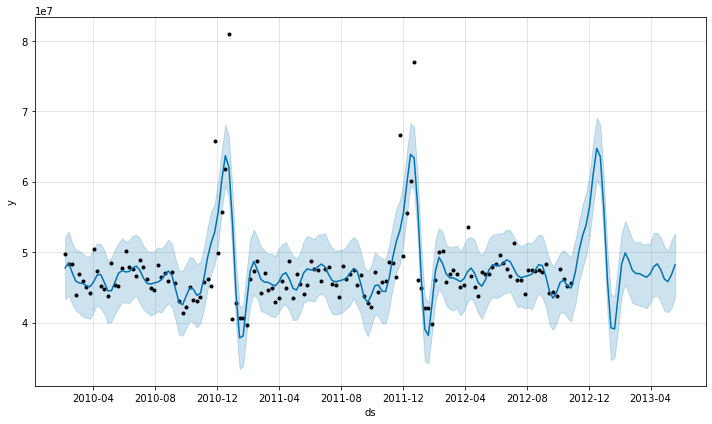

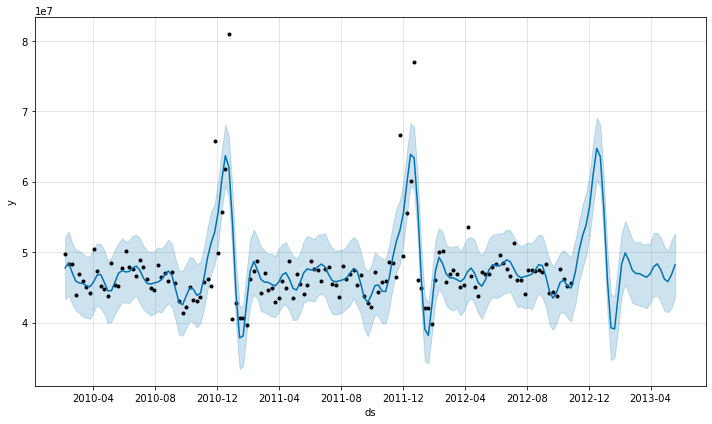

In [20]:
#Plot predicted values
model.plot(prediction)

C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


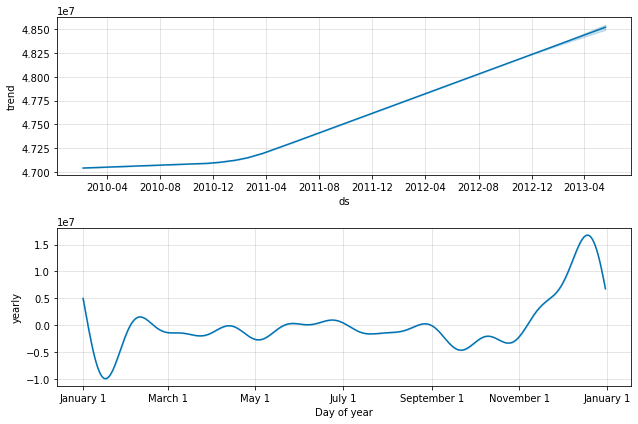

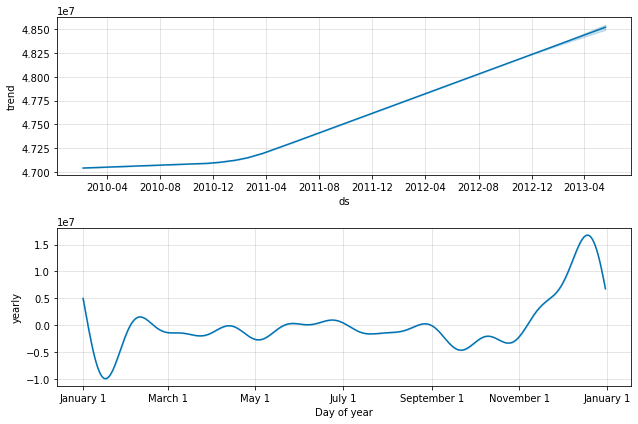

In [24]:
#predicted graph data
model.plot_components(prediction)

In [21]:
#time series analysis -  validation
#1960-1962 cross validation
#1961-196 train
#1961-1962 test
#1962-1963 validation (forecast)

In [22]:
from prophet.diagnostics import cross_validation

In [23]:
#Data_cv = cross_validation(model,initial ='104 Weeks', period = '25 Weeks', horizon ='52 Weeks')
#run cross validation for 365 days
Data_cv = cross_validation(model, initial='550 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2011-10-27 00:00:00 and 2011-10-27 00:00:00
  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pooja\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
100%|██████████| 1/1 [00:03<00:00,  3.53s/it]


In [24]:
Data_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
48,2012-09-28,4.251439e+07,3.830202e+07,4.664548e+07,43734899.40,2011-10-27
49,2012-10-05,4.394175e+07,3.957442e+07,4.869398e+07,47566639.31,2011-10-27
50,2012-10-12,4.436398e+07,4.000725e+07,4.840931e+07,46128514.25,2011-10-27
51,2012-10-19,4.343893e+07,3.936153e+07,4.778800e+07,45122410.57,2011-10-27
52,2012-10-26,4.267161e+07,3.821718e+07,4.684836e+07,45544116.29,2011-10-27


In [25]:
#performace of the Model
from prophet.diagnostics import performance_metrics
Data_p = performance_metrics(Data_cv)
Data_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,5.175339e+13,7.193983e+06,5.303257e+06,0.093879,0.066829,0.100340,0.8
1,36 days,5.630158e+13,7.503438e+06,5.849467e+06,0.104064,0.088177,0.108955,0.6
2,43 days,5.605334e+13,7.486878e+06,5.820032e+06,0.101343,0.074569,0.104884,0.4
3,50 days,5.837296e+13,7.640220e+06,6.268253e+06,0.107633,0.074569,0.110711,0.4
4,57 days,9.487812e+13,9.740540e+06,8.419975e+06,0.130273,0.111943,0.137345,0.2


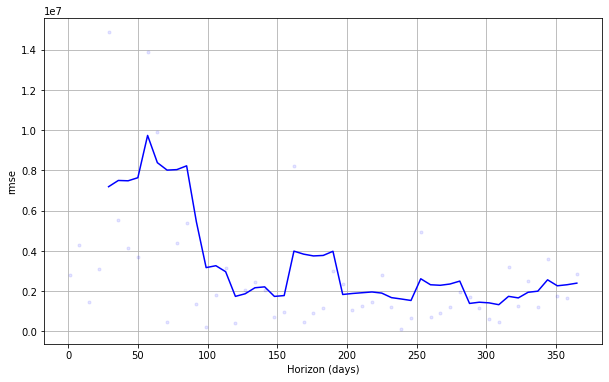

In [26]:
# graph of rmse vs days
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(Data_cv, metric='rmse')